<a href="https://colab.research.google.com/github/Lalitmohansharma1/kaggle-/blob/master/DSG_beginners_hypoth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
# from google.colab import drive
# drive.mount('/content/drive')

In [41]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
from sklearn import preprocessing

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')  # optional: for ggplot-like style

In [42]:
train = pd.read_csv("/content/drive/MyDrive/kaggle/dsg beginners hypothesis/beg-hyp/weather_train.csv")
test = pd.read_csv("/content/drive/MyDrive/kaggle/dsg beginners hypothesis/beg-hyp/weather_test.csv")

In [43]:
train 

,Unnamed: 0,DATE (YYYY/MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Moisture,Albedo (CMP11),Cloud Type,Solar Zenith Angle,Snow Depth [cm]
0,0,2020/02/22,04:11,-1.12724,-0.365968,77.66760,8.210,0.388,-12.412,19.20,1.20,300.10,817.297,0.000,0.0,0.0000,0,50.16,9.460
1,1,2020/07/25,20:10,-1.04030,0.093816,304.73416,20.140,14.855,11.955,59.29,4.45,262.40,820.184,5.334,0.0,0.0000,7,57.39,1.121
2,2,2020/09/13,04:03,-1.29707,-0.251820,68.24852,14.080,6.560,-0.940,35.17,2.45,280.20,822.653,0.000,0.0,0.0000,8,65.63,-0.050
3,3,2020/03/08,15:25,79.20020,-0.014836,237.11811,15.030,5.725,-4.575,24.36,3.70,23.07,809.641,0.000,0.0,0.1587,6,57.08,0.734
4,4,2020/11/17,19:33,-1.61485,-0.459201,271.20406,12.660,3.180,-10.220,17.37,2.70,283.80,818.717,0.000,0.0,0.0000,0,128.59,0.013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2020/04/20,18:47,3.69585,-0.553937,286.76511,13.280,5.410,-3.090,30.95,1.20,35.00,815.183,0.000,0.0,0.0000,0,91.76,0.954
14996,14996,2020/10/12,09:00,515.44400,912.832000,131.12291,16.980,5.677,-8.323,15.55,8.20,302.50,817.411,0.000,0.0,0.2326,0,44.57,-0.277
14997,14997,2020/12/31,09:20,286.39400,872.952000,140.97204,3.642,-1.619,-10.419,31.52,0.00,0.00,812.671,0.000,0.0,0.5277,3,82.88,2.426
14998,14998,2020/06/06,00:25,-1.38846,0.064190,6.62879,23.580,11.528,1.928,24.13,3.45,242.80,813.969,0.000,0.0,0.0000,0,133.73,0.777


In [44]:
test

,Unnamed: 0,DATE (YYYY/MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Moisture,Albedo (CMP11),Cloud Type,Solar Zenith Angle
0,0,23/01/20,19:55,-0.821587,-0.197822,270.39668,0.344,-3.269,-9.469,43.43,1.95,300.70,817.643,0.000,0.0,0.0000,7,163.53
1,1,05/02/20,04:13,-0.464099,0.039564,83.18453,-15.420,-16.249,-19.649,67.07,1.20,308.30,809.469,0.000,0.0,0.0000,0,84.09
2,2,06/06/20,02:25,-1.133330,-0.009875,35.33772,22.380,11.522,3.122,28.25,1.70,214.00,813.392,0.000,0.0,0.0000,7,109.24
3,3,10/05/20,14:17,849.620000,946.128000,244.34737,14.240,6.585,-1.215,34.02,3.45,45.53,821.467,0.000,0.0,0.1844,7,156.80
4,4,11/12/20,15:41,44.193400,0.488831,230.89280,-5.580,-6.169,-7.269,86.40,1.20,15.69,812.324,0.000,1.0,0.6648,7,154.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2401,2401,16/11/20,21:21,-1.444170,-0.360447,292.96778,9.820,3.214,-4.886,33.41,1.70,272.00,824.536,0.000,0.0,0.0000,7,52.08
2402,2402,26/12/20,11:17,490.631000,996.863000,168.59312,14.500,3.446,-13.654,11.30,2.45,154.90,811.310,0.000,0.0,0.2381,3,75.61
2403,2403,09/04/20,00:08,-0.957105,-0.143412,1.93913,6.984,2.890,-1.610,53.41,2.70,22.43,820.148,0.000,0.0,0.0000,3,108.22
2404,2404,16/12/20,11:37,502.869000,978.244000,174.94429,4.311,-1.305,-10.505,29.84,8.70,287.10,814.018,0.000,0.0,0.6220,7,9.83


In [45]:
train = train.rename(columns={"DATE (YYYY/MM/DD)":"date","Snow Depth [cm]":"depth"})
test = test.rename(columns={"DATE (YYYY/MM/DD)":"date","Snow Depth [cm]":"depth"})

In [46]:
from datetime import datetime
import time

In [47]:
train.date=pd.to_datetime(train.date)
train['year']=train["date"].dt.year
train["month"]=train["date"].dt.month
train["day"]=train["date"].dt.day
train.drop(columns=["Unnamed: 0","date"],axis=1,inplace=True)
train[['Hour', 'Minutes']] = train['MST'].str.split(':', expand=True)
# display the dataframe
train

,MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],...,Moisture,Albedo (CMP11),Cloud Type,Solar Zenith Angle,depth,year,month,day,Hour,Minutes
0,04:11,-1.12724,-0.365968,77.66760,8.210,0.388,-12.412,19.20,1.20,300.10,...,0.0,0.0000,0,50.16,9.460,2020,2,22,04,11
1,20:10,-1.04030,0.093816,304.73416,20.140,14.855,11.955,59.29,4.45,262.40,...,0.0,0.0000,7,57.39,1.121,2020,7,25,20,10
2,04:03,-1.29707,-0.251820,68.24852,14.080,6.560,-0.940,35.17,2.45,280.20,...,0.0,0.0000,8,65.63,-0.050,2020,9,13,04,03
3,15:25,79.20020,-0.014836,237.11811,15.030,5.725,-4.575,24.36,3.70,23.07,...,0.0,0.1587,6,57.08,0.734,2020,3,8,15,25
4,19:33,-1.61485,-0.459201,271.20406,12.660,3.180,-10.220,17.37,2.70,283.80,...,0.0,0.0000,0,128.59,0.013,2020,11,17,19,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,18:47,3.69585,-0.553937,286.76511,13.280,5.410,-3.090,30.95,1.20,35.00,...,0.0,0.0000,0,91.76,0.954,2020,4,20,18,47
14996,09:00,515.44400,912.832000,131.12291,16.980,5.677,-8.323,15.55,8.20,302.50,...,0.0,0.2326,0,44.57,-0.277,2020,10,12,09,00
14997,09:20,286.39400,872.952000,140.97204,3.642,-1.619,-10.419,31.52,0.00,0.00,...,0.0,0.5277,3,82.88,2.426,2020,12,31,09,20
14998,00:25,-1.38846,0.064190,6.62879,23.580,11.528,1.928,24.13,3.45,242.80,...,0.0,0.0000,0,133.73,0.777,2020,6,6,00,25


In [48]:
train.drop(columns=["MST","year","day","Hour","Minutes"],axis=1,inplace=True)
train["depth"] = train["depth"]/100
train

,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Moisture,Albedo (CMP11),Cloud Type,Solar Zenith Angle,depth,month
0,-1.12724,-0.365968,77.66760,8.210,0.388,-12.412,19.20,1.20,300.10,817.297,0.000,0.0,0.0000,0,50.16,0.09460,2
1,-1.04030,0.093816,304.73416,20.140,14.855,11.955,59.29,4.45,262.40,820.184,5.334,0.0,0.0000,7,57.39,0.01121,7
2,-1.29707,-0.251820,68.24852,14.080,6.560,-0.940,35.17,2.45,280.20,822.653,0.000,0.0,0.0000,8,65.63,-0.00050,9
3,79.20020,-0.014836,237.11811,15.030,5.725,-4.575,24.36,3.70,23.07,809.641,0.000,0.0,0.1587,6,57.08,0.00734,3
4,-1.61485,-0.459201,271.20406,12.660,3.180,-10.220,17.37,2.70,283.80,818.717,0.000,0.0,0.0000,0,128.59,0.00013,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,3.69585,-0.553937,286.76511,13.280,5.410,-3.090,30.95,1.20,35.00,815.183,0.000,0.0,0.0000,0,91.76,0.00954,4
14996,515.44400,912.832000,131.12291,16.980,5.677,-8.323,15.55,8.20,302.50,817.411,0.000,0.0,0.2326,0,44.57,-0.00277,10
14997,286.39400,872.952000,140.97204,3.642,-1.619,-10.419,31.52,0.00,0.00,812.671,0.000,0.0,0.5277,3,82.88,0.02426,12
14998,-1.38846,0.064190,6.62879,23.580,11.528,1.928,24.13,3.45,242.80,813.969,0.000,0.0,0.0000,0,133.73,0.00777,6


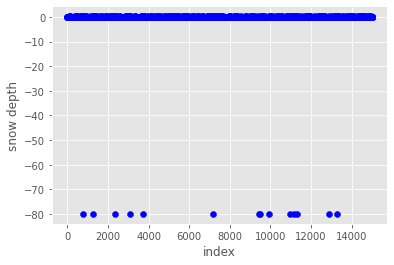

In [49]:
plt.scatter(train.index, train.depth ,color = "blue")
plt.xlabel("index")
plt.ylabel("snow depth")
plt.show()

In [50]:
train["depth"].value_counts()

 0.00838    20
 0.00817    20
 0.00864    20
 0.00988    19
 0.00835    18
            ..
 0.03111     1
 0.21180     1
-0.00414     1
 0.21590     1
 0.02426     1
Name: depth, Length: 3539, dtype: int64

In [51]:
test.date=pd.to_datetime(test.date)
test['year']=test["date"].dt.year
test["month"]=test["date"].dt.month
test["day"]=test["date"].dt.day
test.drop(columns=["Unnamed: 0","date"],axis=1,inplace=True)
test[['Hour', 'Minutes']] = test['MST'].str.split(':', expand=True)
test

,MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],...,Precipitation (Accumulated) [mm],Moisture,Albedo (CMP11),Cloud Type,Solar Zenith Angle,year,month,day,Hour,Minutes
0,19:55,-0.821587,-0.197822,270.39668,0.344,-3.269,-9.469,43.43,1.95,300.70,...,0.000,0.0,0.0000,7,163.53,2020,1,23,19,55
1,04:13,-0.464099,0.039564,83.18453,-15.420,-16.249,-19.649,67.07,1.20,308.30,...,0.000,0.0,0.0000,0,84.09,2020,5,2,04,13
2,02:25,-1.133330,-0.009875,35.33772,22.380,11.522,3.122,28.25,1.70,214.00,...,0.000,0.0,0.0000,7,109.24,2020,6,6,02,25
3,14:17,849.620000,946.128000,244.34737,14.240,6.585,-1.215,34.02,3.45,45.53,...,0.000,0.0,0.1844,7,156.80,2020,10,5,14,17
4,15:41,44.193400,0.488831,230.89280,-5.580,-6.169,-7.269,86.40,1.20,15.69,...,0.000,1.0,0.6648,7,154.89,2020,11,12,15,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2401,21:21,-1.444170,-0.360447,292.96778,9.820,3.214,-4.886,33.41,1.70,272.00,...,0.000,0.0,0.0000,7,52.08,2020,11,16,21,21
2402,11:17,490.631000,996.863000,168.59312,14.500,3.446,-13.654,11.30,2.45,154.90,...,0.000,0.0,0.2381,3,75.61,2020,12,26,11,17
2403,00:08,-0.957105,-0.143412,1.93913,6.984,2.890,-1.610,53.41,2.70,22.43,...,0.000,0.0,0.0000,3,108.22,2020,9,4,00,08
2404,11:37,502.869000,978.244000,174.94429,4.311,-1.305,-10.505,29.84,8.70,287.10,...,0.000,0.0,0.6220,7,9.83,2020,12,16,11,37


In [52]:
test.drop(columns=["MST","year","day","Hour","Minutes"],axis=1,inplace=True)

In [53]:
Features=["Global CMP22 (vent/cor) [W/m^2]","Direct sNIP [W/m^2]","Azimuth Angle [degrees]","Tower Dry Bulb Temp [deg C]","Tower Wet Bulb Temp [deg C]","Tower Dew Point Temp [deg C]","Tower RH [%]","Peak Wind Speed @ 6ft [m/s]","Avg Wind Direction @ 6ft [deg from N]","Station Pressure [mBar]","Precipitation (Accumulated) [mm]","Moisture","Albedo (CMP11)","Cloud Type","Solar Zenith Angle","month"]
Target=["depth"]

In [54]:
X=np.asarray(train[Features])
X

array([[-1.1272400e+00, -3.6596800e-01,  7.7667600e+01, ...,
         0.0000000e+00,  5.0160000e+01,  2.0000000e+00],
       [-1.0403000e+00,  9.3816000e-02,  3.0473416e+02, ...,
         7.0000000e+00,  5.7390000e+01,  7.0000000e+00],
       [-1.2970700e+00, -2.5182000e-01,  6.8248520e+01, ...,
         8.0000000e+00,  6.5630000e+01,  9.0000000e+00],
       ...,
       [ 2.8639400e+02,  8.7295200e+02,  1.4097204e+02, ...,
         3.0000000e+00,  8.2880000e+01,  1.2000000e+01],
       [-1.3884600e+00,  6.4190000e-02,  6.6287900e+00, ...,
         0.0000000e+00,  1.3373000e+02,  6.0000000e+00],
       [ 4.3538100e+02,  7.6554000e+02,  2.5474761e+02, ...,
         1.0000000e+00,  5.4060000e+01,  9.0000000e+00]])

In [55]:
Y= np.asarray(train[Target])
Y

array([[ 0.0946 ],
       [ 0.01121],
       [-0.0005 ],
       ...,
       [ 0.02426],
       [ 0.00777],
       [ 0.00342]])

In [56]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X

array([[-0.68784071, -0.648703  , -1.02316414, ..., -0.83533362,
        -0.97908117, -1.30934485],
       [-0.68754143, -0.64745343,  1.23349252, ...,  1.49168618,
        -0.79932643,  0.14376056],
       [-0.68842534, -0.64839278, -1.11677383, ...,  1.82411757,
        -0.59446072,  0.72500273],
       ...,
       [ 0.30193024,  1.72473089, -0.39402533, ...,  0.16196058,
        -0.16558531,  1.59686597],
       [-0.68873994, -0.64753395, -1.72916948, ..., -0.83533362,
         1.09866483, -0.14686052],
       [ 0.81480715,  1.43281513,  0.73671095, ..., -0.50290222,
        -0.88211803,  0.72500273]])

# Model making.

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size=0.3,random_state=6)

In [58]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

regr = linear_model.LinearRegression()

In [59]:
regr.fit(X_train,y_train)

LinearRegression()

In [60]:
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.03161573  0.0320713   0.12196282  0.20240871 -0.33898393  0.14758752
  -0.05585365 -0.03135931  0.0708661   0.02728057 -0.22376827 -0.11128705
   0.09766581 -0.01286371 -0.00906733 -0.04296305]]
Intercept:  [-0.07653337]


In [61]:
yhat=regr.predict(X_test)
yhat

array([[-0.00417682],
       [ 0.64012583],
       [-0.05657723],
       ...,
       [ 0.18557465],
       [-2.71377479],
       [ 0.37299384]])

In [62]:
from sklearn.metrics import r2_score

print("R2-score: %.2f" % r2_score(y_test, yhat) )

R2-score: -0.02


In [64]:
from sklearn.metrics import r2_score
# print('MSE: %.2f' % mean_squared_error(y_test, yhat))
print('R^2: %.2f' % r2_score(y_test,yhat))
print("Mean absolute error: %.2f" % np.mean(np.absolute(yhat - y_test)))

R^2: -0.02
Mean absolute error: 0.22


In [65]:
test = preprocessing.StandardScaler().fit(test).transform(test)

In [66]:
youtput=regr.predict(test)
youtput

array([[ 0.20946118],
       [ 0.01284163],
       [-0.21549755],
       ...,
       [-0.39973402],
       [ 0.19004668],
       [ 0.09254258]])

In [73]:
output = pd.read_csv("/content/drive/MyDrive/kaggle/dsg beginners hypothesis/beg-hyp/sample_submission.csv",index_col="Id")
output['Snow Depth [cm]']= youtput*100
output

,Snow Depth [cm]
Id,
0,20.946118
1,1.284163
2,-21.549755
3,-3.208029
4,-27.077659
...,...
2401,14.538360
2402,-6.049324
2403,-39.973402


In [72]:
output.to_csv('submission.csv')